# World Happiness Report 2015-2021

## Purpose
In this notebook, I apply the CRISP-DM process on the world happiness data from 2015 to 2021. This dataset could be founded  in the Kaggle Dataset [World Happiness Report 2015-2021](https://www.kaggle.com/mathurinache/world-happiness-report-20152021). 

The Happiness Score is explained by the following factors:

* Economy
* Healthy Life Expectancy
* Social support
* Freedom to make life choices
* Generosity
* Corruption Perception
* Residual error

I try to find the answers to these questions:

* Which country/region are the top happiest or the least happy countries?

* How did the happiness score and other factors change from 2015 to 2021?

* Which factors are the most influence for happiness score?



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

# Data Preprocesing 
So, we need to tranform these files into Same Format Columns
* Data in 2020 and 2021 do not have "Happiness Rank" column, so we need to add new column from the country index order to unify column names

* Except for data in 2015, 2016, the rest of the files are missing columns "Region". So I will create a dictionary of region to map all countries.

* "Explained by: Social support" column in 2020, 2021 should be Family

In [3]:
df_2015 = pd.read_csv('./2015.csv')
df_2015['Year'] = 2015 
df_2015 = df_2015.rename(columns = {
    'Economy (GDP per Capita)':'Economy'})

df_2016 = pd.read_csv('./2016.csv')
df_2016['Year'] = 2016
df_2016 = df_2016.rename(columns = {
    'Economy (GDP per Capita)':'Economy'})

df_2017 = pd.read_csv('./2017.csv')

df_2017['Year'] = 2017 
df_2017 = df_2017.rename(columns = {
    'Happiness.Rank': 'Happiness Rank', 
    'Happiness.Score': 'Happiness Score',                                   
    'Economy..GDP.per.Capita.': 'Economy',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)', 
    'Dystopia.Residual': 'Dystopia Residual'
})
df_2017.loc[df_2017["Country"] == "Hong Kong S.A.R., China", "Country"] = "Hong Kong S.A.R. of China"


df_2018 = pd.read_csv('./2018.csv')
df_2018['Year'] = 2018
df_2018 = df_2018.rename(columns = {
    'Overall rank': 'Happiness Rank', 
    'Country or region': 'Country', 
    'Score': 'Happiness Score',                                  
    'GDP per capita': 'Economy', 
    'Social support': 'Family',                                  
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',                                  
    'Perceptions of corruption': 'Trust (Government Corruption)'
})

df_2019 = pd.read_csv('./2019.csv')
df_2019['Year'] = 2019 
df_2019 = df_2019.rename(columns = {
    'Overall rank': 'Happiness Rank', 
    'Country or region': 'Country', 
    'Score': 'Happiness Score',                                 
    'GDP per capita': 'Economy', 
    'Social support': 'Family',                                  
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom', 
    'Perceptions of corruption': 'Trust (Government Corruption)'
})

df_2020 = pd.read_csv('./2020.csv')
df_2020['Happiness Rank'] =  range(1, len(df_2020.index)+1)
df_2020['Year'] = 2020
df_2020= df_2020.drop(columns = ["Generosity"])
df_2020 = df_2020.rename(columns = {
    'Country name': 'Country', 
    'Ladder score': 'Happiness Score',                                       
    'Explained by: Log GDP per capita': 'Economy', 
    'Explained by: Social support': 'Family', 
    'Explained by: Healthy life expectancy': 'Health (Life Expectancy)',
    'Explained by: Freedom to make life choices': 'Freedom', 
    'Perceptions of corruption': 'Trust (Government Corruption)',
    "Explained by: Generosity" : "Generosity"
})


df_2021 = pd.read_csv('./2021.csv')
df_2021['Happiness Rank'] =  range(1, len(df_2021.index)+1)
df_2021['Year'] = 2021
df_2021= df_2021.drop(columns = ["Generosity"])
df_2021 = df_2021.rename(columns = {
    'Country name': 'Country', 
    'Ladder score': 'Happiness Score',           
    'Explained by: Log GDP per capita': 'Economy', 
    'Explained by: Social support': 'Family', 
    'Explained by: Healthy life expectancy': 'Health (Life Expectancy)',                                  
    'Explained by: Freedom to make life choices': 'Freedom', 
    'Perceptions of corruption': 'Trust (Government Corruption)',
    "Explained by: Generosity" : "Generosity"
})

## Create columns "Region" for each dataframe in 2017, 2018 , 2019, 2020
Except for data in 2015, 2016, the rest of the files are missing columns "Region". So I will create a dictionary of region to map all countries.

In [4]:
region_map = df_2016.groupby(by="Region", as_index=False)["Country"].agg(lambda x:list(x)) 
region_map.head()

countries_map = {row["Country"][i]: row["Region"]
                 for idx ,row in region_map.iterrows()
                 for i in range(len(row["Country"]))}

region_map2 = df_2015.groupby(by="Region", as_index=False)["Country"].agg(lambda x:list(x)) 
countries_map2 = {row["Country"][i]: row["Region"]
                 for idx ,row in region_map2.iterrows()
                 for i in range(len(row["Country"]))}

#merge 2 country_2_region dictionary and add some missing data
countries_map3 = dict(chain.from_iterable(d.items() for d in (countries_map, countries_map2)))    

countries_map3.update({"Taiwan Province of China": "Eastern Asia",
                      "Hong Kong S.A.R. of China": "Eastern Asia",
                      "Trinidad & Tobago": "Latin America and Caribbean",
                      "Northern Cyprus": 'Middle East and Northern Africa',
                      "North Macedonia": 'Central and Eastern Europe',
                      "Gambia": "Sub-Saharan Africa",
                      "Maldives": "Southern Asia",
                      })

df_2017['Region'] = df_2017['Country'].map(countries_map3)
df_2018['Region'] = df_2018['Country'].map(countries_map3)
df_2019['Region'] = df_2019['Country'].map(countries_map3)
df_2020['Region'] = df_2020['Country'].map(countries_map3)
df_2021['Region'] = df_2021['Country'].map(countries_map3)

## Merget multiple dataframes into a new dataframe

I then gather multiple dataframes from to 2015 - 2021 into the New Data Frame

In [5]:
cols = [
    'Country', 
    'Region',
    'Happiness Rank', 
    'Happiness Score', 
    'Economy',                               
    'Family', 
    'Health (Life Expectancy)', 
    'Freedom',
    'Trust (Government Corruption)',                               
    'Generosity', 
    'Year'
]
data = pd.DataFrame(columns = cols)
df_list = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]
for i in range(len(df_list)):
    # print(i)
    data = data.append(df_list[i][cols], ignore_index='True')

In [6]:
# Let's change some country name in a short version.
data.loc[data["Country"] == "Hong Kong S.A.R., China", "Country"] = "Hong Kong"
data.loc[data["Country"] == "Hong Kong S.A.R. of China", "Country"] = "Hong Kong"
data.loc[data["Country"] == "Central African Republic", "Country"] = "CAR"

region_map = {  'Australia and New Zealand': "Aus & NZ", 
                'Central and Eastern Europe': "Central&East EU",
                'Eastern Asia':  'Eastern Asia', 
                'Latin America and Caribbean': "Latin& Caribbean",
                'Middle East and Northern Africa': "ME&N Africa", 
                'North America': 'North America',
                'Southeastern Asia': 'Southeastern Asia', 
                'Southern Asia': 'Southern Asia', 
                'Sub-Saharan Africa': 'Sub-Saharan Africa',
                'Western Europe': 'Western Europe'
              }
data['Region'] = data['Region'].map(region_map) 

# Statitical Description
Let's check missing data and some statistical description

In [7]:
# getting an overview of our data
print("The data has shape:", data.shape)
# checking for missing values
print("Missing values report")
print(data.isnull().any())
data.describe()

The data has shape: (1084, 11)
Missing values report
Country                          False
Region                           False
Happiness Rank                   False
Happiness Score                  False
Economy                          False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)     True
Generosity                       False
Year                             False
dtype: bool


,Happiness Score,Economy,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1083.000000,1084.000000
mean,5.413460,0.917775,1.050106,0.611090,0.430544,0.294111,0.208883
std,1.118595,0.402909,0.332036,0.248616,0.152699,0.300707,0.117375
min,2.523000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.571000,0.613437,0.833081,0.436887,0.329800,0.068178,0.122397
50%,5.385150,0.982214,1.082250,0.643840,0.448940,0.136957,0.195977
75%,6.216125,1.238750,1.310616,0.799323,0.552335,0.500726,0.265933
max,7.842000,2.096000,1.644000,1.141000,0.724000,0.939000,0.838075


In [8]:
# Find row with missing data
data[data.isna().any(axis=1)]

,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
489,United Arab Emirates,ME&N Africa,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2018


# Visualization

## Count countries in each region

Region
Sub-Saharan Africa    45
Central&East EU       30
Latin& Caribbean      25
ME&N Africa           21
Western Europe        21
Southeastern Asia      9
Southern Asia          8
Eastern Asia           7
Aus & NZ               2
North America          2
Name: Country, dtype: int64


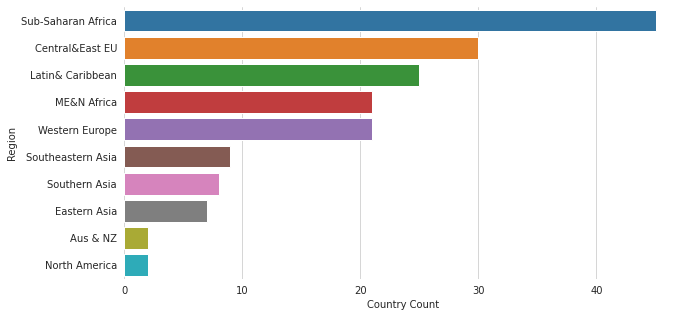

In [9]:
df_ = data.groupby('Region').Country.nunique().sort_values(ascending=False)
print(df_)
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10,5))
    sns.barplot(y=df_.index, x=df_)
    plt.gca().set_xlabel('Country Count')
    sns.despine(left=True, bottom=True)

In [10]:
df_

Region
Sub-Saharan Africa    45
Central&East EU       30
Latin& Caribbean      25
ME&N Africa           21
Western Europe        21
Southeastern Asia      9
Southern Asia          8
Eastern Asia           7
Aus & NZ               2
North America          2
Name: Country, dtype: int64

# Happiness Score

In [11]:
df_Happiness = data.pivot(index='Country', columns='Year', values='Happiness Score')
df_Happiness["Avg"] = df_Happiness.mean(axis=1)
df_Happiness = df_Happiness.sort_values(by = ["Avg"], ascending= False)
df_Happiness = df_Happiness.reset_index()

In [12]:
df_Happiness

Year,Country,2015,2016,2017,2018,2019,2020,2021,Avg
0,Finland,7.406,7.413,7.469,7.632,7.769,7.8087,7.842,7.619957
1,Denmark,7.527,7.526,7.522,7.555,7.600,7.6456,7.620,7.570800
2,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5599,7.571,7.526843
3,Iceland,7.561,7.501,7.504,7.495,7.494,7.5045,7.554,7.516214
4,Norway,7.522,7.498,7.537,7.594,7.554,7.4880,7.392,7.512143
...,...,...,...,...,...,...,...,...,...
165,Syria,3.006,3.069,3.462,3.462,3.462,NaN,NaN,3.292200
166,Burundi,2.905,2.905,2.905,2.905,3.775,3.7753,3.775,3.277900
167,South Sudan,NaN,3.832,3.591,3.254,2.853,2.8166,NaN,3.269320
168,Afghanistan,3.575,3.360,3.794,3.632,3.203,2.5669,2.523,3.236271


In [13]:
def display_fig(df, col_name,
                dates = [2015, 2016, 2017, 2018, 2019, 2020, 2021],
                topN = 5, 
                option = "top",
                xmin = 0, xmax= 9,
                figsize = (20, 6), 
                title = "Happiness Score by Region from 2015 to 2021"):
    """
    Inputs: 
    df: dataframe
    col_name: Name of column we visualize data base on  it (Region" or "Country")
    date: list of years
    topN: number of countries/regions to visualize
    option: "bottom" or "top"
    """ 
    fig, ax_array = plt.subplots(nrows = 2, ncols = 4, 
                                 figsize = figsize,
                                #  dpi = 144, 
                                 tight_layout = True
                                 )

    for ax, date in zip(ax_array.flatten(), dates):
    
        # Series with desired date
        s = df[[col_name, date]]
        # Rank every country, then drop NaN values
        if option == "top":
            s_rank = s.sort_values(by = [date], ascending= False)       
            x = s_rank[:topN][date].iloc[::-1]
            y = s_rank[:topN][col_name].iloc[::-1]
        if option == "bottom":  
            s_rank = s.sort_values(by = [date], ascending= True)       
            x = s_rank[:topN][date]
            y = s_rank[:topN][col_name]  

        colors = ['#aaf542','#5c0794','#ae63e0','#a6a2a8','#97b814','#b86314']
        ax.barh (y = y, 
                height=0.6 , 
                alpha=0.9,
                width = (x.values), 
                color = colors,
                )
        ax.set_xlim(xmin = xmin, xmax= xmax)
        ax.set_title(date, fontsize = 10)

    fig.delaxes(ax_array.flatten()[-1])
    plt.xlabel( title, fontsize=14)
    # plt.title(title, loc='center', fontsize = 14)
    # ax.legend(prop={'size': 6})
        # prettify(ax)
    plt.show()


## Top 5 Happiest Countries from 2015 to 2021

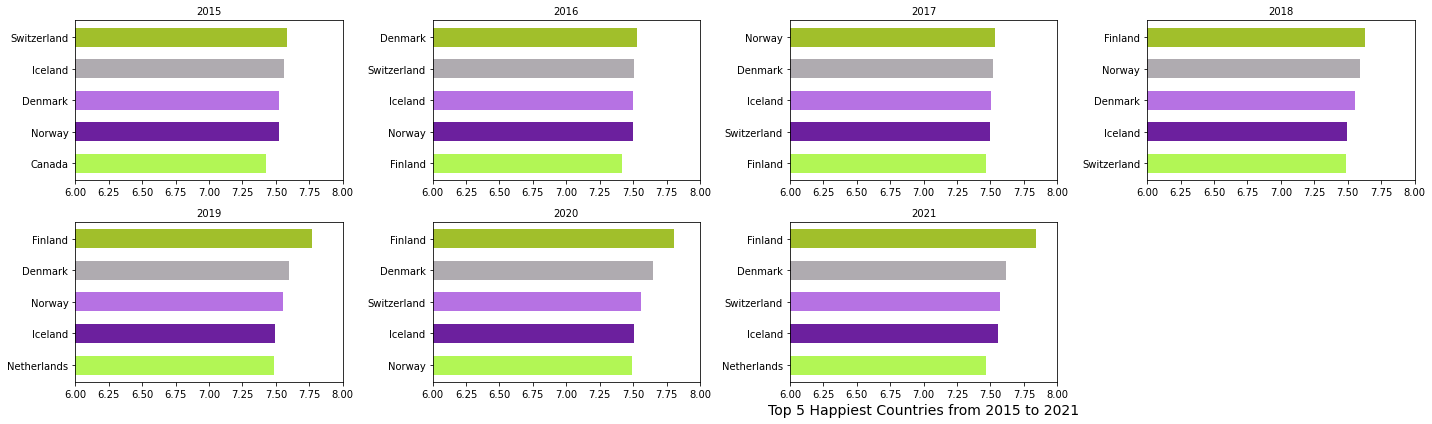

In [14]:
display_fig(df_Happiness, "Country", 
            option = "top",
            xmin = 6, xmax= 8,
            title= "Top 5 Happiest Countries from 2015 to 2021")

## The least happy country from 2015 to 2021

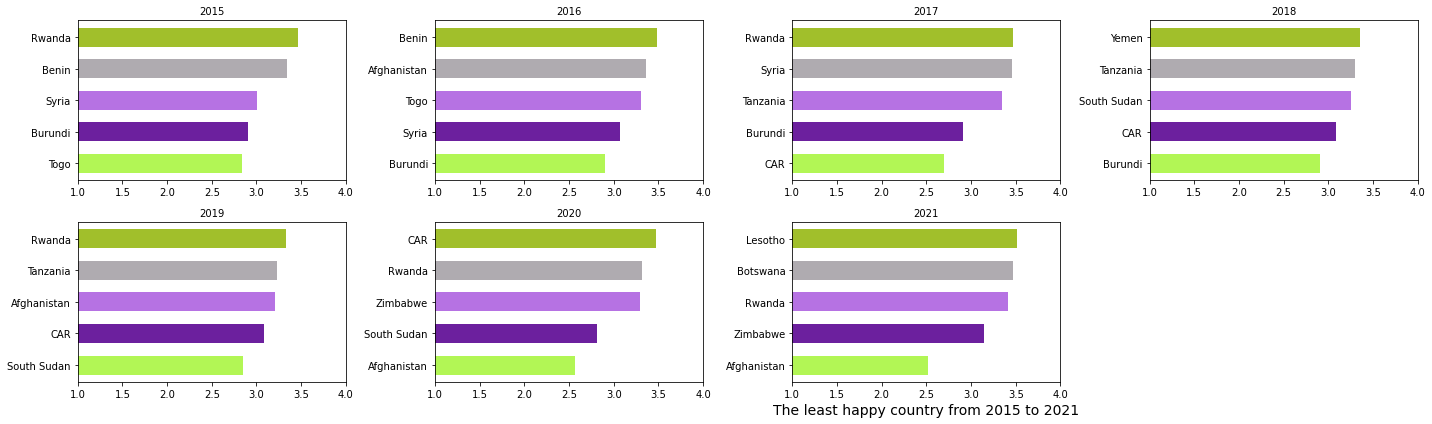

In [15]:
display_fig(df_Happiness, "Country", 
            option = "bottom",
            xmin = 1, xmax= 4,
            topN = 5,
            title= "The least happy country from 2015 to 2021")

## Happiness Score by Regions From 2015 to 2021

In [16]:
region_happniess_df = pd.pivot_table(data, index= 'Region', columns='Year', values="Happiness Score")
region_happniess_df = region_happniess_df.reset_index()           


In [17]:
region_happniess_df

Year,Region,2015,2016,2017,2018,2019,2020,2021
0,Aus & NZ,7.285000,7.323500,7.299000,7.298000,7.267500,7.261200,7.230000
1,Central&East EU,5.332931,5.370690,5.409931,5.463966,5.561517,5.666379,5.770517
2,Eastern Asia,5.626167,5.624167,5.646667,5.672000,5.688833,5.714850,5.810333
3,Latin& Caribbean,6.144682,6.101750,5.957818,5.950136,5.954429,5.981786,5.908050
4,ME&N Africa,5.406900,5.386053,5.369684,5.310350,5.261050,5.227159,5.219765
5,North America,7.273000,7.254000,7.154500,7.107000,7.085000,7.085850,7.027000
6,Southeastern Asia,5.317444,5.338889,5.444875,5.313444,5.273667,5.383367,5.407556
7,Southern Asia,4.580857,4.563286,4.628429,4.603857,4.526857,4.475443,4.441857
8,Sub-Saharan Africa,4.202800,4.136421,4.111949,4.195026,4.300050,4.383495,4.494472
9,Western Europe,6.689619,6.685667,6.703714,6.829100,6.898400,6.899219,6.914905


<Figure size 432x288 with 0 Axes>

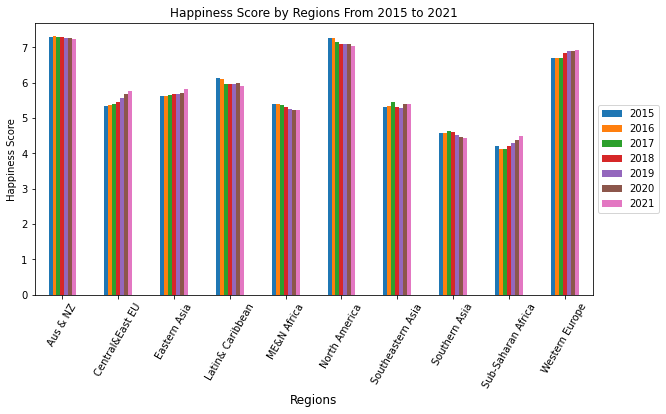

In [18]:
plt.figure()
region_happniess_df.plot(kind = 'bar', figsize=(10,5))
plt.xlabel('Regions', fontsize=12)
plt.ylabel("Happiness Score")
plt.xticks(np.arange(0, 10, step = 1), list(region_happniess_df.Region), rotation =60)
plt.yticks(np.arange(0, 8, step = 1))
plt.title('Happiness Score by Regions From 2015 to 2021', fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The visual representation helps reveal that the differences are minor. Having said that, this also shows that there’s a permanent decrease in the Happiness rank of both of the regions located in America.

In [19]:
df_Happiness

Year,Country,2015,2016,2017,2018,2019,2020,2021,Avg
0,Finland,7.406,7.413,7.469,7.632,7.769,7.8087,7.842,7.619957
1,Denmark,7.527,7.526,7.522,7.555,7.600,7.6456,7.620,7.570800
2,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5599,7.571,7.526843
3,Iceland,7.561,7.501,7.504,7.495,7.494,7.5045,7.554,7.516214
4,Norway,7.522,7.498,7.537,7.594,7.554,7.4880,7.392,7.512143
...,...,...,...,...,...,...,...,...,...
165,Syria,3.006,3.069,3.462,3.462,3.462,NaN,NaN,3.292200
166,Burundi,2.905,2.905,2.905,2.905,3.775,3.7753,3.775,3.277900
167,South Sudan,NaN,3.832,3.591,3.254,2.853,2.8166,NaN,3.269320
168,Afghanistan,3.575,3.360,3.794,3.632,3.203,2.5669,2.523,3.236271


## Happiness distribution over all countries  in 2015 and 2021

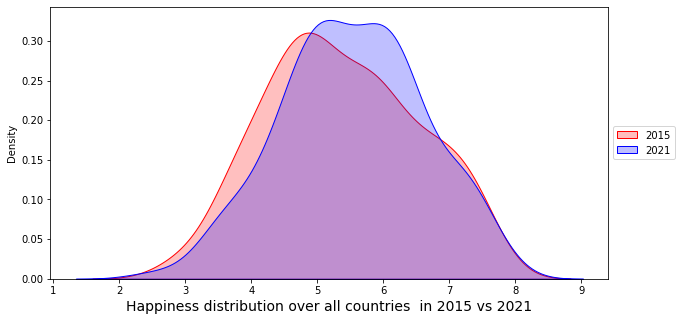

In [20]:
# Plotting the KDE Plot
plt.figure(figsize = (10, 5))
sns.kdeplot(df_Happiness[2015], color='r', shade=True, Label='2015')
  
sns.kdeplot(df_Happiness[2021], color='b', shade=True, Label='2021')
plt.xlabel('Happiness distribution over all countries  in 2015 vs 2021', size=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# sns.despine(left=True)
  

## Happiness change over 2015 and 2021

Text(0.5, 1.0, 'Happiness score change from 2015 to 2021')

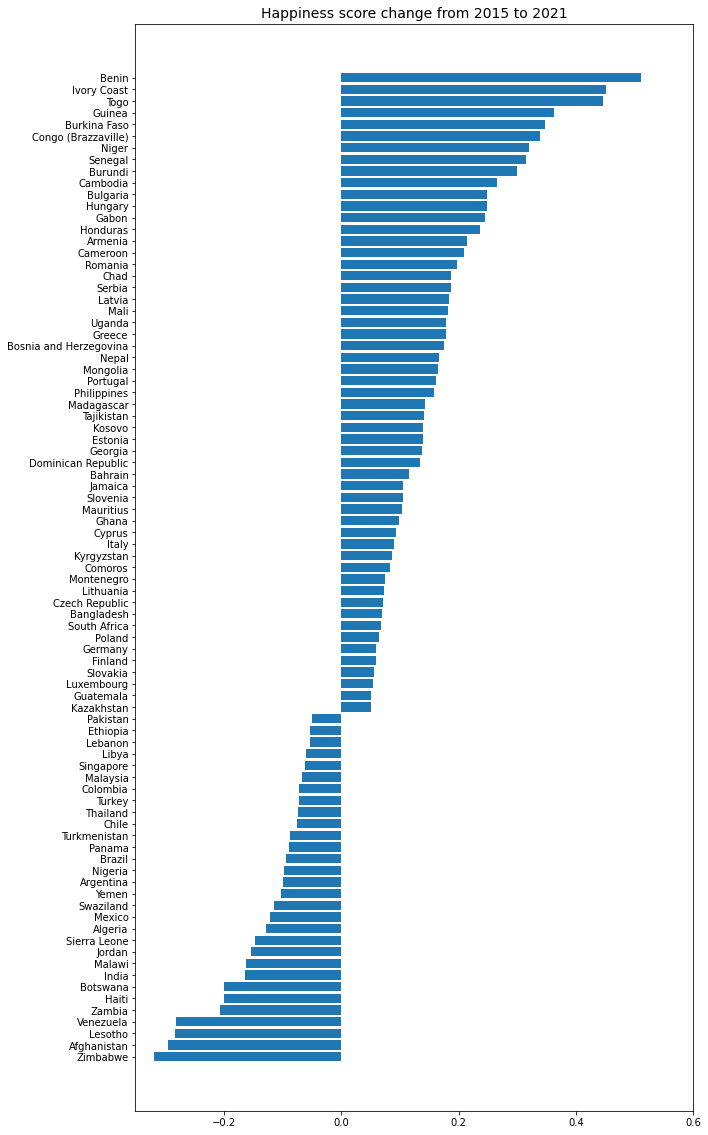

In [21]:
temp = df_Happiness.copy()
temp = temp[["Country", 2015,2021]]

temp['Change'] = (temp[2021] - temp[2015]) / temp[2015]

temp = temp.dropna(axis = 0)
threshold = 0.05
df_change  = temp[np.abs(temp['Change']) > threshold]
df_change  = df_change.sort_values('Change')

plt.figure(figsize=(10,20))
# plt.plot(figsize = (20, 10))
x = df_change["Country"]
y = df_change["Change"]
plt.barh    (x,y, 
            # height=0.4 , 
            # alpha=0.9,
            # width = (x.values), 
             )
plt.xlim((-0.35,0.6))
plt.title("Happiness score change from 2015 to 2021", fontsize = 14)


# Economy


In [23]:
df_gdp = pd.pivot_table(data, index= 'Region', columns='Year', values= 'Economy')
df_gdp["GDP_average"] = df_gdp.mean(axis=1)
df_gdp = df_gdp.sort_values(by = ["GDP_average"], ascending= False)
df_gdp = df_gdp.reset_index()         

In [24]:
df_gdp

Year,Region,2015,2016,2017,2018,2019,2020,2021,GDP_average
0,North America,1.360400,1.474055,1.512732,1.364000,1.399000,1.337817,1.490000,1.419715
1,Western Europe,1.298596,1.417056,1.457411,1.325650,1.362050,1.300418,1.462905,1.374869
2,Aus & NZ,1.291880,1.402545,1.445060,1.304000,1.337500,1.276357,1.426500,1.354835
3,Eastern Asia,1.151780,1.277312,1.318716,1.205500,1.235167,1.185275,1.304000,1.239678
4,ME&N Africa,1.066974,1.139323,1.168535,1.088550,1.069250,0.998307,1.058882,1.084260
5,Central&East EU,0.942438,1.047537,1.092051,0.989345,1.021069,0.980971,1.111345,1.026394
6,Latin& Caribbean,0.876815,0.993410,1.006981,0.901318,0.924286,0.871039,0.955400,0.932750
7,Southeastern Asia,0.789054,0.896381,0.965253,0.894000,0.930000,0.890821,0.973556,0.905581
8,Southern Asia,0.560486,0.660671,0.697479,0.625143,0.650286,0.640591,0.715286,0.649992
9,Sub-Saharan Africa,0.380473,0.474321,0.501749,0.442846,0.443750,0.437448,0.503111,0.454814


## The economy by Region from 2015 to 2021

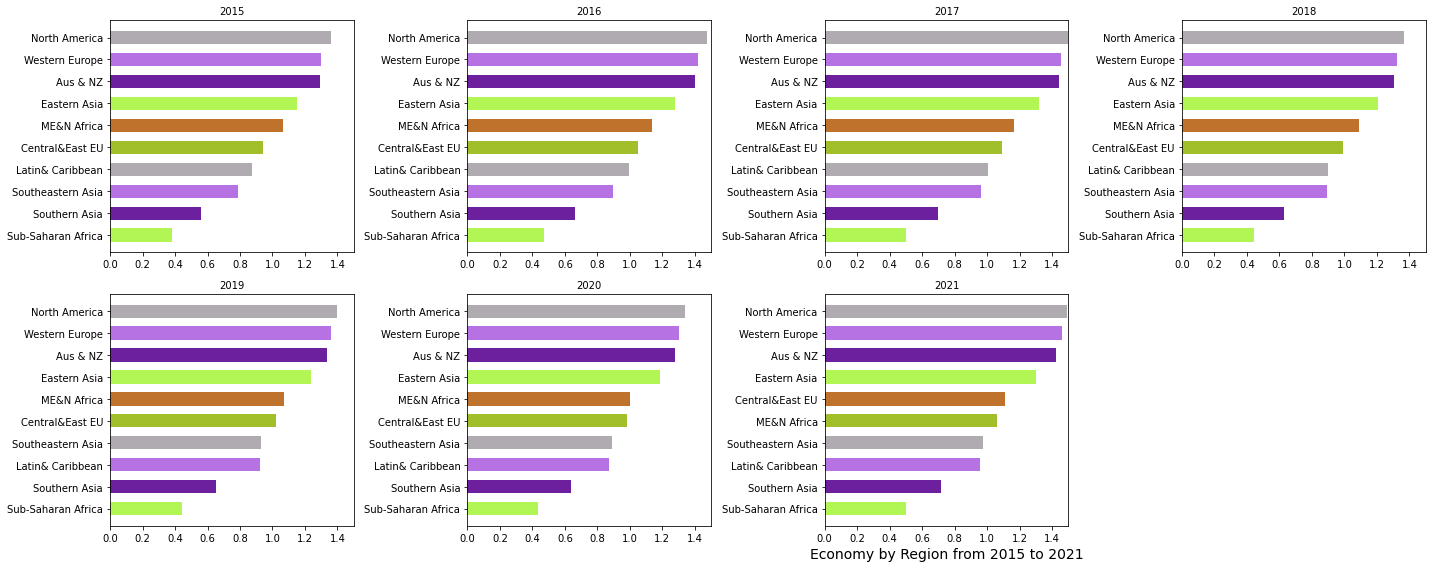

In [25]:
display_fig(df_gdp, "Region", 
            option = "top",
            xmin = 0, xmax= 1.5,
            topN = 10,
            figsize = (20, 8),
            title= 'Economy by Region from 2015 to 2021' )

## Economy Change by Regions From 2015 to 2021

<Figure size 432x288 with 0 Axes>

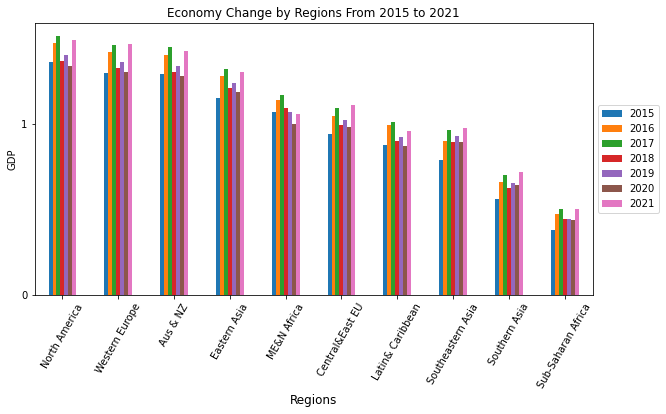

In [26]:
plt.figure()
df_gdp.drop(columns = "GDP_average").plot(kind = 'bar', figsize=(10,5))
plt.xlabel('Regions', fontsize=12)
plt.ylabel("GDP")
plt.xticks(np.arange(0, 10, step = 1), list(df_gdp.Region), rotation =60)
plt.yticks(np.arange(0, 1.5, step = 1))
plt.title('Economy Change by Regions From 2015 to 2021', fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#  Freedom
## Freedom by Region from 2015 to 2021

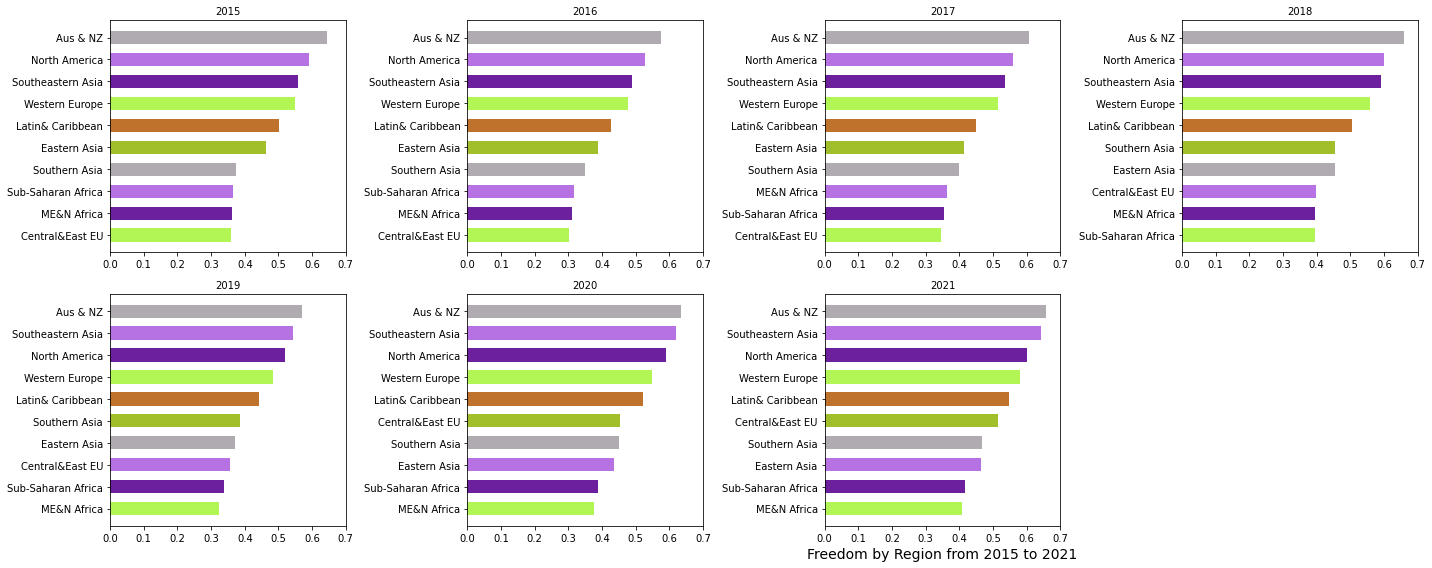

In [27]:
df_freedom = pd.pivot_table(data, index= 'Region', columns='Year', values= 'Freedom')
df_freedom["Avg"] = df_freedom.mean(axis=1)
df_freedom = df_freedom.sort_values(by = ["Avg"], ascending= False)
df_freedom = df_freedom.reset_index()  

display_fig(df_freedom, "Region", 
            option = "top",
            xmin = 0, xmax= 0.7,
            topN = 10,
            figsize = (20, 8),
            title= 'Freedom by Region from 2015 to 2021' )

## Freedom change by Regions From 2015 to 2021

<Figure size 432x288 with 0 Axes>

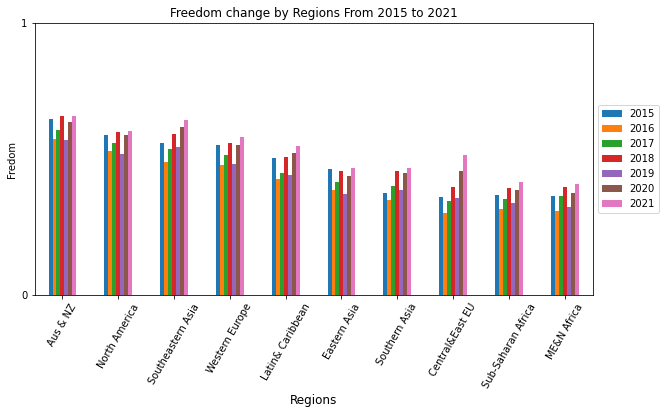

In [28]:
plt.figure()
df_freedom.drop(columns = "Avg").plot(kind = 'bar', figsize=(10,5))
plt.xlabel('Regions', fontsize=12)
plt.ylabel("Fredom")
plt.xticks(np.arange(0, 10, step = 1), list(df_freedom.Region), rotation =60)
plt.yticks(np.arange(0, 1.5, step = 1))
plt.title('Freedom change by Regions From 2015 to 2021', fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Social Support
## Social support by Region from 2015 to 2021

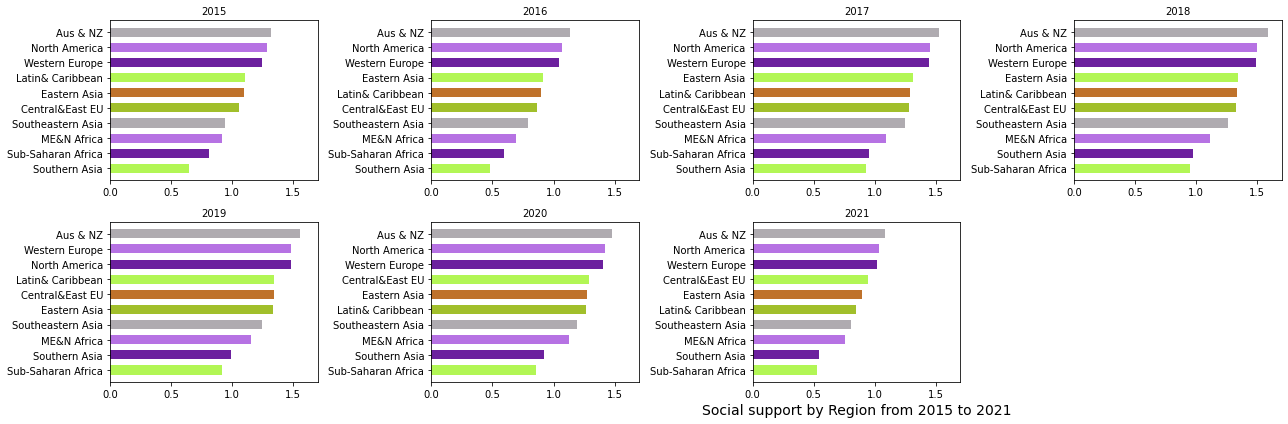

In [29]:
df_family = pd.pivot_table(data, index= 'Region', columns='Year', values= 'Family')
df_family["Avg"] = df_family.mean(axis=1)
df_family = df_family.sort_values(by = ["Avg"], ascending= False)
df_family = df_family.reset_index()  

display_fig(df_family, "Region", 
            option = "top",
            xmin = 0, xmax= 1.7,
            topN = 10,
            figsize = (18, 6),
            title= 'Social support by Region from 2015 to 2021' )

## Social Support Change by Regions From 2015 to 2021

<Figure size 432x288 with 0 Axes>

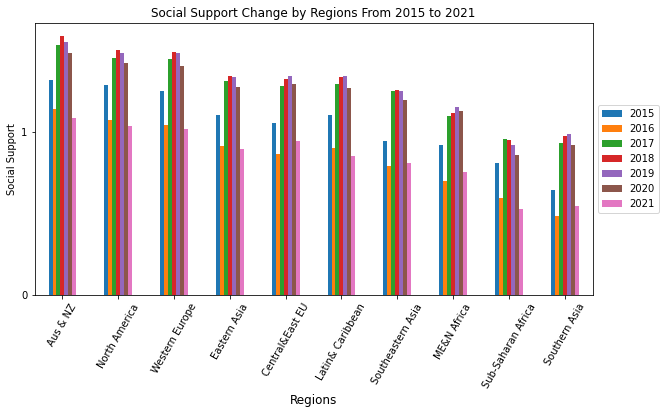

In [30]:
plt.figure()
df_family.drop(columns = "Avg").plot(kind = 'bar', figsize=(10,5))
plt.xlabel('Regions', fontsize=12)
plt.ylabel("Social Support")
plt.xticks(np.arange(0, 10, step = 1), list(df_family.Region), rotation =60)
plt.yticks(np.arange(0, 1.5, step = 1))
plt.title('Social Support Change by Regions From 2015 to 2021', fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Health (Life Expectancy)

## Health (Life Expectancy) by Region from 2015 to 2021

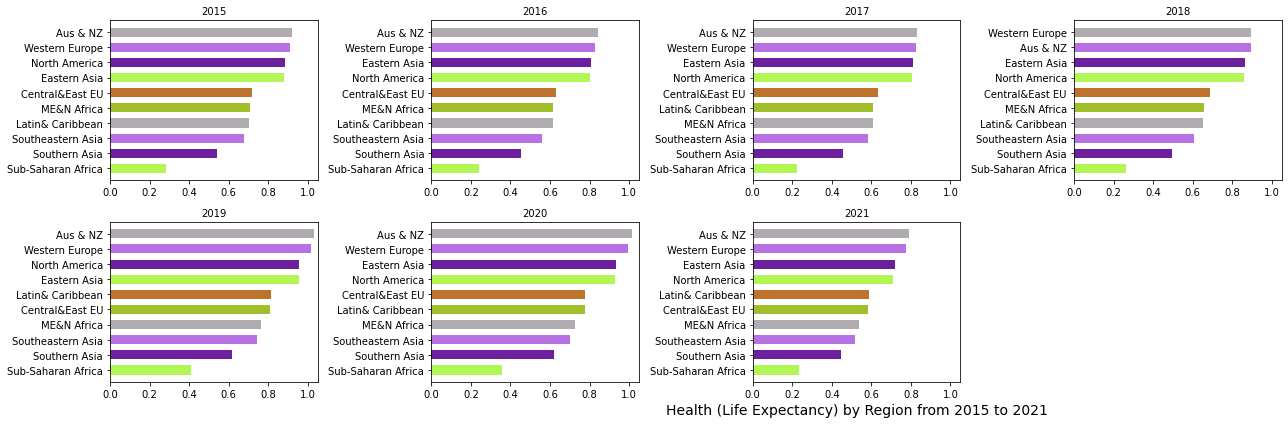

In [31]:
df_health = pd.pivot_table(data, index= 'Region', columns='Year', values= 'Health (Life Expectancy)')
df_health ["Avg"] = df_health.mean(axis=1)
df_health  = df_health.sort_values(by = ["Avg"], ascending= False)
df_health  = df_health.reset_index()  

display_fig(df_health , "Region", 
            option = "top",
            xmin = 0, xmax= 1.05,
            topN = 10,
            figsize = (18, 6),
            title= 'Health (Life Expectancy) by Region from 2015 to 2021' )

## Health (Life Expectancy) change by Regions From 2015 to 2021

<Figure size 432x288 with 0 Axes>

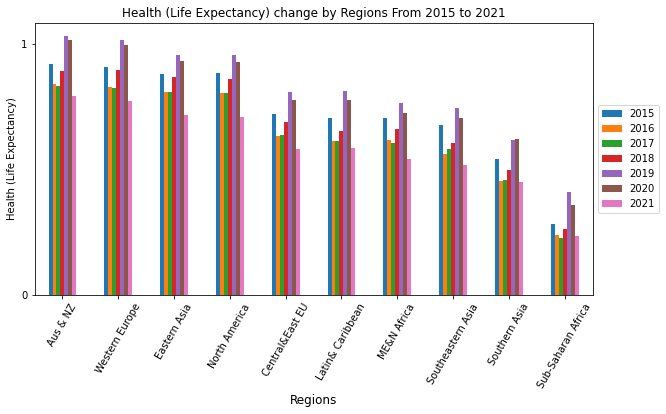

In [32]:
plt.figure()
df_health .drop(columns = "Avg").plot(kind = 'bar', figsize=(10,5))
plt.xlabel('Regions', fontsize=12)
plt.ylabel("Health (Life Expectancy)")
plt.xticks(np.arange(0, 10, step = 1), list(df_health.Region), rotation =60)
plt.yticks(np.arange(0, 1.5, step = 1))
plt.title('Health (Life Expectancy) change by Regions From 2015 to 2021', fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Generosity
## Generosity by Region from 2015 to 2021

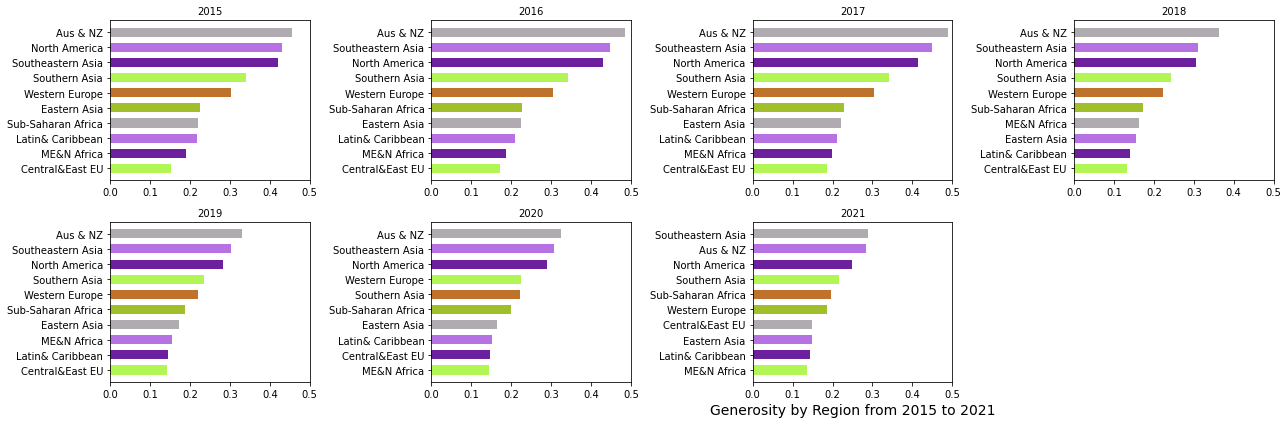

In [33]:
df_generosity = pd.pivot_table(data, index= 'Region', columns='Year', values= 'Generosity')
df_generosity["Avg"] = df_generosity.mean(axis=1)
df_generosity = df_generosity.sort_values(by = ["Avg"], ascending= False)
df_generosity = df_generosity.reset_index()  

display_fig(df_generosity , "Region", 
            option = "top",
            xmin = 0, xmax= 0.5,
            topN = 10,
            figsize = (18, 6),
            title= 'Generosity by Region from 2015 to 2021' )

## Generosity change by Regions From 2015 to 2021

<Figure size 432x288 with 0 Axes>

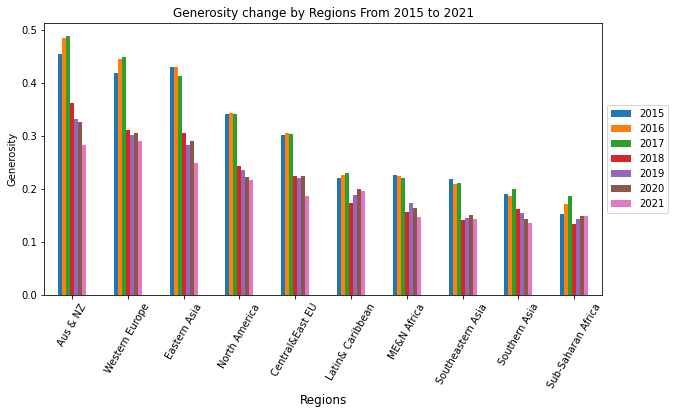

In [34]:
plt.figure()
df_generosity.drop(columns = "Avg").plot(kind = 'bar', figsize=(10,5))
plt.xlabel('Regions', fontsize=12)
plt.ylabel("Generosity")
plt.xticks(np.arange(0, 10, step = 1), list(df_health.Region), rotation =60)
plt.yticks(np.arange(0, 0.6, step = 0.1))
plt.title('Generosity change by Regions From 2015 to 2021', fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Which factors are the most influence for happiness score? 

In [35]:
# Compute the correlation matrix
corr = data.corr()
# corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,Happiness Score,Economy,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.00,0.79,0.63,0.73,0.56,0.08,0.10
Economy,0.79,1.00,0.57,0.77,0.36,0.03,-0.05
Family,0.63,0.57,1.00,0.62,0.36,-0.12,-0.02
Health (Life Expectancy),0.73,0.77,0.62,1.00,0.34,0.00,-0.01
Freedom,0.56,0.36,0.36,0.34,1.00,0.24,0.24
Trust (Government Corruption),0.08,0.03,-0.12,0.00,0.24,1.00,-0.07
Generosity,0.10,-0.05,-0.02,-0.01,0.24,-0.07,1.00


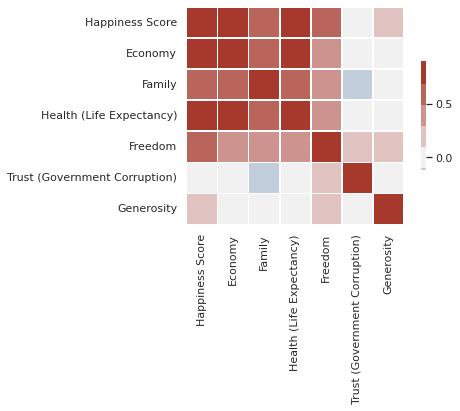

In [36]:
sns.set_theme(style='white')
mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(8,6))

cmap = sns.diverging_palette(250, 15, s=75, l=40,
                                  n=9, )
# sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, 
            # mask=mask, 
            cmap=cmap,
            vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5});

The above figure show that economy, social support health are the most importance factors to the happiness score. 

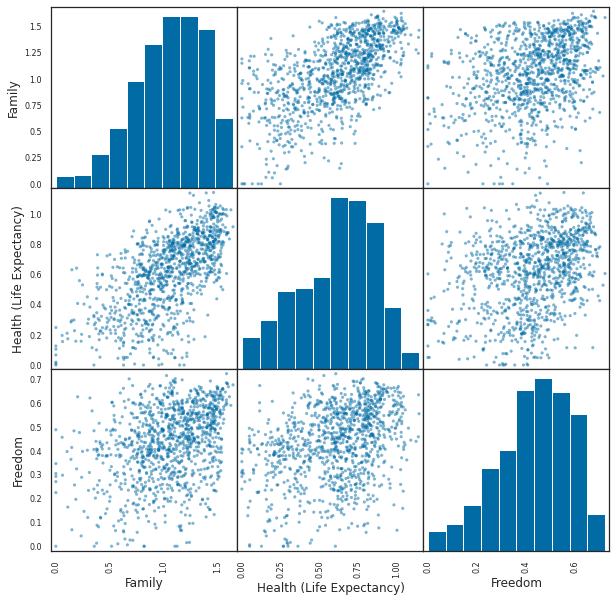

In [37]:
%matplotlib inline
plt.style.use('tableau-colorblind10')
temp = data.loc[:,["Family", "Health (Life Expectancy)", "Freedom"]]
pd.plotting.scatter_matrix(temp, figsize = [10,10], s=40, cmap='brg')
plt.show()

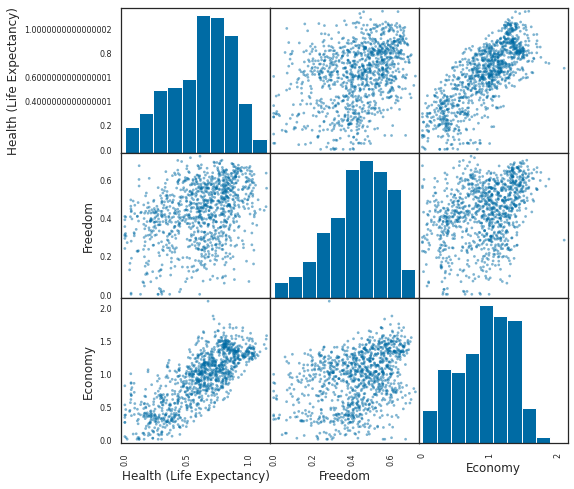

In [38]:
plt.style.use('tableau-colorblind10')
temp = data.loc[:,["Health (Life Expectancy)", "Freedom", "Economy"]]
pd.plotting.scatter_matrix(temp, figsize = [8,8], cmap='brg', 
                        #    diagonal='kde' , 
                        marker   = ".",
                        s       = 30,
                        alpha =0.5)
plt.show()

# Summary
